<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 10/01/22 </div>

**Universtiät Stuttgart: Mathematik und Physik**

# Physikalisches Fortgeschrittenenpraktikum: Raman Effect


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

# xtype options: "wavelength" or "wavenumber".
xtype = "wavenumber"

# units options: "wavelength: nm" or "wavenumber: cm$^{-1}$ ".
units = "cm$^{-1}$"

# Lowpass : Stokes Filter
# Bandpass : Anti-Stokes Filter

In [2]:
# When not commented, allows to have interactive plots.
# Do not store graphs with uncommented command.

#%matplotlib notebook  

In [3]:
vo = 1e7/632.8 + 40

def read_data(step,filename):
    """
    wavelength in nm
    wavenumber in cm^-1
    """
    df = (pd.read_csv(f"data/Step{step}/{filename}", header=None)
         .rename(columns={0:"wavelength",1:"intensity"}))
    df["wavenumber"] = 1e7/df.wavelength - vo
    return df

In [4]:
def probe_data(case,probe,savefig=False):
    print(f"\nShowing data of probe {probe}")
    
    dark_noise = 9300
    
    if case == "bp":
        df1 = read_data(4,f"P{probe}_bandpass_25.asc")
        df2 = read_data(4,f"P{probe}_bandpass_115.asc")
        llabel = "Stokes Filter"
    else:
        df1 = read_data(4,f"P{probe}_lowpass_25.asc")
        df2 = read_data(4,f"P{probe}_lowpass_115.asc")
        llabel = "Anti-Stokes Filter"
    plt.plot(df1[xtype],df1.intensity - dark_noise, label = f"{llabel} 25$\\degree$", lw = 1.7);
    plt.plot(df2[xtype],df2.intensity - dark_noise, label = f"{llabel} 115$\\degree$", lw = 1.7);
        
    plt.xlabel("Relative " + xtype.title() + " [" + units +"]")
    plt.ylabel("Intensity [counts]")
    plt.legend()
    plt.grid()
    if savefig:
        plt.savefig(f'images/{case}_P{probe}_fig.pdf')
    plt.show()


Showing data of probe 3


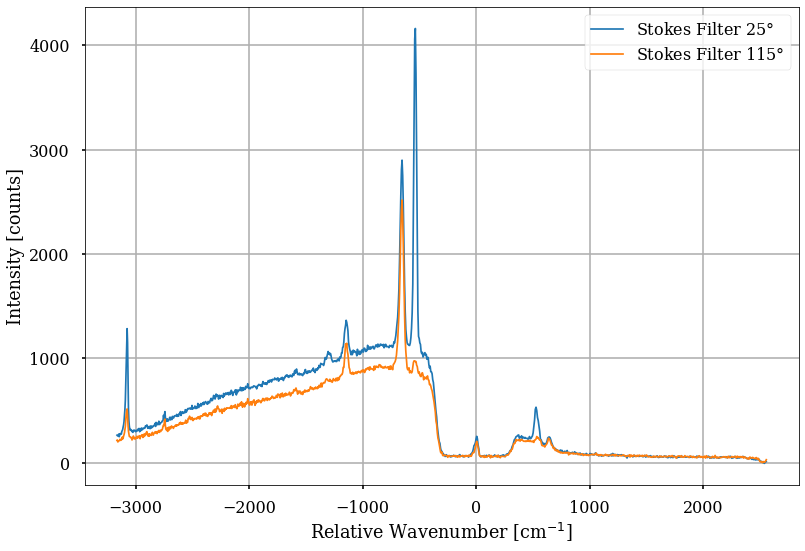

In [5]:
probe_data("bp",3)

In [6]:
P1 = [(np.array([703.3,687.9]))*1e2, [12254.2,9454.0]]
P2 = [(np.array([366.5,354.3]))*1e2, [11322.4-9900,9996.6]]
P3 = [(np.array([536.8,524.0]))*1e2, [13460.7-10400,9831.0]]
P4 = [(np.array([367.3,350.7]))*1e2, [10293.0-9450,9652.0]]
P5 = [(np.array([519.9,518.9]))*1e2, [11833.6,9632.5]]


P = [P1,P2,P3,P4,P5]

kb_real = 1.380649e-23 #Js

T  = 298.15 # K
h  = 6.62607004e-34 #Js
c  = 299792458  # m/s

In [7]:
probe = 5
vs = P[probe-1][0][0]
va = P[probe-1][0][1]
Is = P[probe-1][1][0]
Ia = P[probe-1][1][1]
print(f"& {vs} & {va} & {Is} & {Ia}")

& 51990.0 & 51890.0 & 11833.6 & 9632.5


$$
        k_B = \frac{h c\tilde{\nu}_{x}}{T}\left[\ln{\frac{I_{\text {Stokes }}}{I_{\text {anti-Stokes }}}}\frac{\left(\tilde{\nu}_{0}+\tilde{\nu}_{M}\right)^{4}}{\left(\tilde{\nu}_{0}-\tilde{\nu}_{M}\right)^{4}}\right]^{-1}
    \label{kbeq}
$$

$\tilde{\nu}_{x}$: varies between $\tilde{\nu}_{s}$ and $\tilde{\nu}_{a}$

In [8]:
Kb_ = lambda Is,Ia,va,vs,x: (h*c*x/T)*( 1/( np.log((Is/Ia)*( ((vo+va)/(vo-vs))**4 )) ) )

probe = 5
x = P[probe-1][0][0] # 0:s, 1:a

vs = P[probe-1][0][0]
va = P[probe-1][0][1]
Is = P[probe-1][1][0]
Ia = P[probe-1][1][1]

Kb_(Is,Ia,va,vs,x)

1.274568601771944e-23

In [9]:

Kb1s_ = 2.3187174412406884e-23; Kb1a_ = 2.2679450132652772e-23
Kb2s_ = 1.473165954875093e-23; Kb2a_ = 1.4241274155859357e-23
Kb3s_ = 2.999847857649297e-23; Kb3a_ = 2.928316463130089e-23
Kb4s_ = 2.173414943308498e-23; Kb4a_ = 2.0751881857290782e-23
Kb5s_ = 1.274568601771944e-23; Kb5a_ = 1.272117036852206e-23


Av1_ = (Kb1s_+Kb1a_)/2; Av1_ = float('%.7g' % Av1_)
Av2_ = (Kb2s_+Kb2a_)/2; Av2_ = float('%.7g' % Av2_)
Av3_ = (Kb3s_+Kb3a_)/2; Av3_ = float('%.7g' % Av3_)
Av4_ = (Kb4s_+Kb4a_)/2; Av4_ = float('%.7g' % Av4_)
Av5_ = (Kb5s_+Kb5a_)/2; Av5_ = float('%.7g' % Av5_)


Av1_,Av2_,Av3_,Av4_,Av5_

(2.293331e-23, 1.448647e-23, 2.964082e-23, 2.124302e-23, 1.273343e-23)

$$
    T= \frac{h c\tilde{\nu}_{M}}{k_B}\left[\ln{\frac{I_{\text {Stokes }}}{I_{\text {anti-Stokes }}}}\frac{\left(\tilde{\nu}_{0}+\tilde{\nu}_{M}\right)^{4}}{\left(\tilde{\nu}_{0}-\tilde{\nu}_{M}\right)^{4}}\right]^{-1} 
$$

$\tilde{\nu}_{x}$: varies between $\tilde{\nu}_{s}$ and $\tilde{\nu}_{a}$

In [10]:
Temp_ = lambda Is,Ia,va,vs,x: (h*c*x/kb_real)*( 1/( np.log((Is/Ia)*( ((vo+va)/(vo-vs))**4 )) ) )

probe = 5
x = P[probe-1][0][1] # 0:s, 1:a

vs = P[probe-1][0][0]
va = P[probe-1][0][1]
Is = P[probe-1][1][0]
Ia = P[probe-1][1][1]

Temp_(Is,Ia,va,vs,x)

274.7126130808664

In [11]:
T1s = 574.4743225822165;   T1a = 561.8951891146121
T2s = 146.17337675855072;  T2a = 141.3075781324816
T3s = 327.38372128258254;  T3a = 319.5772540090784
T4s = 148.28188404508364;  T4a = 141.58033415358244
T5s = 297.7927951490421;   T5a = 297.22000654517785

AvT1 = round((T1s+T1a)/2,2)
AvT2 = round((T2s+T2a)/2,2)
AvT3 = round((T3s+T3a)/2,2)
AvT4 = round((T4s+T4a)/2,2)
AvT5 = round((T5s+T5a)/2,2)

In [12]:
np.array([AvT1,AvT2,AvT3,AvT4,AvT5]) #- 272.15 # temps in Celcius

array([568.18, 143.74, 323.48, 144.93, 297.51])